* The purpose of this notebook is to satisfy curiosity and have fun.
* I used to wonder if I should buy US stocks or Canadian stocks. This analysis may shed some light.
* You can set other stocks and compare them, as well as the periods and intervals of historical data. (You can refer to yfinance: https://github.com/ranaroussi/yfinance)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from arch import arch_model
from scipy import stats
import returns,pfmgmt,risks,plot

In [2]:
# Set Tickers and parameters
tickers = {
    'SP500':'^GSPC',  # The ticker you set here will be the benchmark. Maybe you should always set SP500 here or maybe not.
    'Bitcoin':'BTC-USD',
    'Tesla':'TSLA',
    'NVIDIA':'NVDA',
    'RBC':'RBC',
    'Crude_Oil ':'CL=F'
}

#prd = '20y'
interval = '1wk'

# **1. Summary**

## **Get Returns**

### Historical Returns

In [3]:
df_hist = returns.get_historcial_data(tickers=tickers,start_date='2010-01-01',interval=interval)

In [4]:
df_ret = returns.log_return(df_hist,tickers=tickers)
df_ret.head()

,SP500,Bitcoin,Tesla,NVIDIA,RBC,Crude_Oil,SP500_Ret,Bitcoin_Ret,Tesla_Ret,NVIDIA_Ret,RBC_Ret,Crude_Oil _Ret
2014-09-12,2011.359985,377.181000,17.288000,4.647890,60.381351,92.529999,0.006940,-0.055788,-0.073866,0.001544,-0.021429,-0.005819
2014-09-19,1965.989990,320.510010,16.440001,4.425537,58.414562,91.010002,-0.022815,-0.162812,-0.050295,-0.049022,-0.033115,-0.016563
2014-09-26,1946.170044,378.549011,17.014000,4.349029,55.449409,85.769997,-0.010133,0.166432,0.034319,-0.017439,-0.052094,-0.059300
2014-10-03,1928.209961,389.545990,15.794000,4.282084,53.901939,82.699997,-0.009271,0.028636,-0.074406,-0.015513,-0.028305,-0.036450
2014-10-10,1862.760010,354.704010,15.165333,4.172103,53.881973,82.089996,-0.034533,-0.093698,-0.040618,-0.026020,-0.000370,-0.007403


### Cumulative Log Returns

In [5]:
# Computer the cumulative log returns
df_his = returns.cum_return(df_hist)
df_his.head()

,SP500,Bitcoin,Tesla,NVIDIA,RBC,Crude_Oil,SP500_Ret,Bitcoin_Ret,Tesla_Ret,NVIDIA_Ret,RBC_Ret,Crude_Oil _Ret,SP500_Ret_Cum,Bitcoin_Ret_Cum,Tesla_Ret_Cum,NVIDIA_Ret_Cum,RBC_Ret_Cum,Crude_Oil _Ret_Cum
2014-09-12,2011.359985,377.181000,17.288000,4.647890,60.381351,92.529999,0.006940,-0.055788,-0.073866,0.001544,-0.021429,-0.005819,0.006940,-0.055788,-0.073866,0.001544,-0.021429,-0.005819
2014-09-19,1965.989990,320.510010,16.440001,4.425537,58.414562,91.010002,-0.022815,-0.162812,-0.050295,-0.049022,-0.033115,-0.016563,-0.015875,-0.218599,-0.124161,-0.047478,-0.054544,-0.022382
2014-09-26,1946.170044,378.549011,17.014000,4.349029,55.449409,85.769997,-0.010133,0.166432,0.034319,-0.017439,-0.052094,-0.059300,-0.026008,-0.052167,-0.089842,-0.064917,-0.106638,-0.081683
2014-10-03,1928.209961,389.545990,15.794000,4.282084,53.901939,82.699997,-0.009271,0.028636,-0.074406,-0.015513,-0.028305,-0.036450,-0.035279,-0.023531,-0.164248,-0.080429,-0.134943,-0.118132
2014-10-10,1862.760010,354.704010,15.165333,4.172103,53.881973,82.089996,-0.034533,-0.093698,-0.040618,-0.026020,-0.000370,-0.007403,-0.069812,-0.117229,-0.204866,-0.106449,-0.135313,-0.125536


## **Tickers' Infomation**

In [6]:
ticker_info = returns.get_ticker_info(tickers=tickers)
ticker_info

,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,...,dividendRate,dividendYield,exDividendDate,fiveYearAvgDividendYield,lastDividendValue,lastDividendDate,address2,fax,expireDate,openInterest
SP500,86400,2,4330.00,4341.74,4316.490,4357.4000,4330.00,4341.74,4316.490,4357.4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitcoin,86400,2,26221.67,26221.67,26047.773,26331.9260,26221.67,26221.67,26047.773,26331.9260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tesla,86400,2,255.70,257.40,244.480,257.7888,255.70,257.40,244.480,257.7888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVIDIA,86400,2,410.17,415.72,412.310,421.1500,410.17,415.72,412.310,421.1500,...,0.16,0.0004,1.693958e+09,0.17,0.04,1.693958e+09,NaN,NaN,NaN,NaN
RBC,86400,2,232.39,232.11,230.900,237.1300,232.39,232.11,230.900,237.1300,...,NaN,NaN,1.401235e+09,NaN,0.35,1.664410e+09,102 Willenbrock Road,203 267 5000,NaN,NaN
Crude_Oil,86400,2,90.03,90.55,90.080,90.6500,90.03,90.55,90.080,90.6500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.697760e+09,364112.0


# **2.Data Preparing**

In [7]:
# abstract tickers' Log Returns columns
ret_col = [col for col in df_ret.columns if 'Ret' in col and 'Cum' not in col]
# abstract tickers' cumulative Returns columns
cum_col = [col for col in df_ret.columns if 'Cum' in col]

In [8]:
# Put resutls into a DataFrame
cum_ret = []
for col in cum_col:
    cum_ret.append(df_ret[col][-1])

data = {'Cumulative_Return':cum_ret}

df_results = pd.DataFrame(data=data,index=list(tickers.keys()))
df_results

,Cumulative_Return
SP500,0.773696
Bitcoin,4.182128
Tesla,2.620127
NVIDIA,4.481703
RBC,1.326308
Crude_Oil,-0.028444


# **3.EDA**

## 3.1 Data Summary

In [9]:
df_ret[ret_col].describe().T

,count,mean,std,min,25%,50%,75%,max
SP500_Ret,471.0,0.001643,0.023332,-0.198044,-0.009118,0.003258,0.013299,0.098984
Bitcoin_Ret,471.0,0.008879,0.100494,-0.407891,-0.033756,0.009547,0.058868,0.347021
Tesla_Ret,471.0,0.005563,0.078610,-0.299232,-0.044133,0.006328,0.052134,0.287720
NVIDIA_Ret,471.0,0.009515,0.062771,-0.335465,-0.025849,0.011088,0.041701,0.309899
RBC_Ret,471.0,0.002816,0.046873,-0.380051,-0.023029,0.002910,0.027463,0.221840
Crude_Oil _Ret,471.0,-0.000060,0.057178,-0.376478,-0.029252,0.002348,0.032568,0.223144


Interesting...
* NASDAQ has the largest mean returns and std, however has the smallest maximun and minimun returns.

## 3.2 Univariate

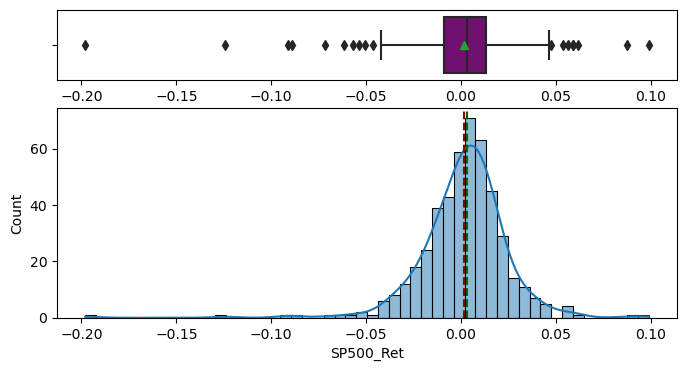

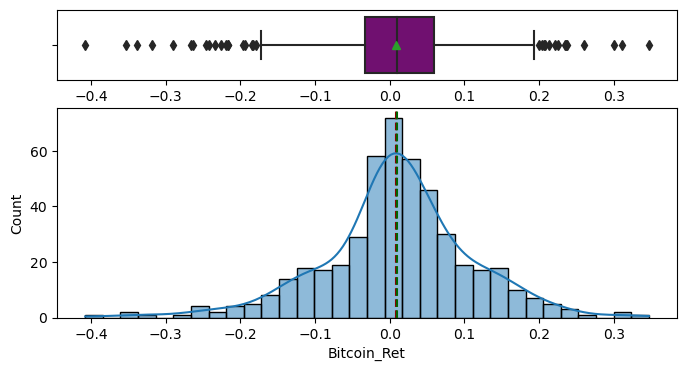

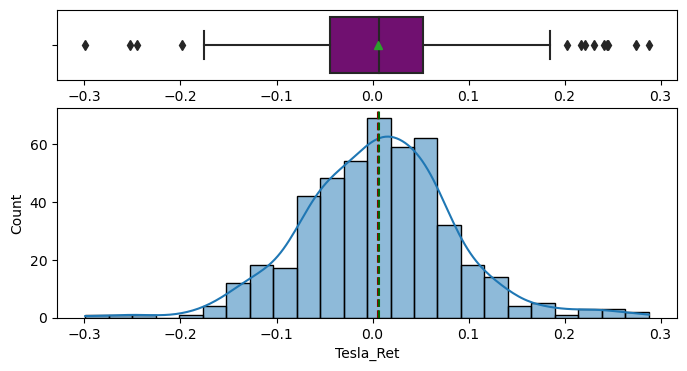

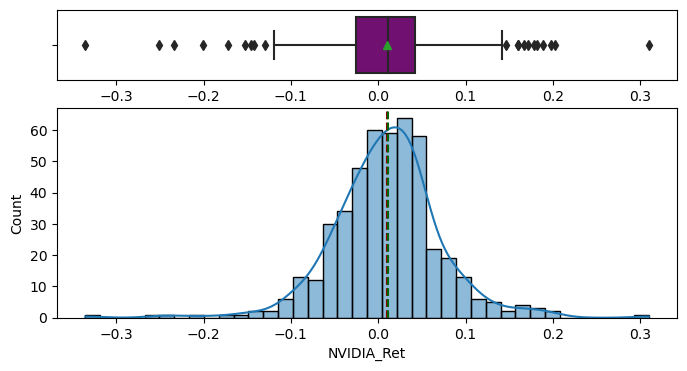

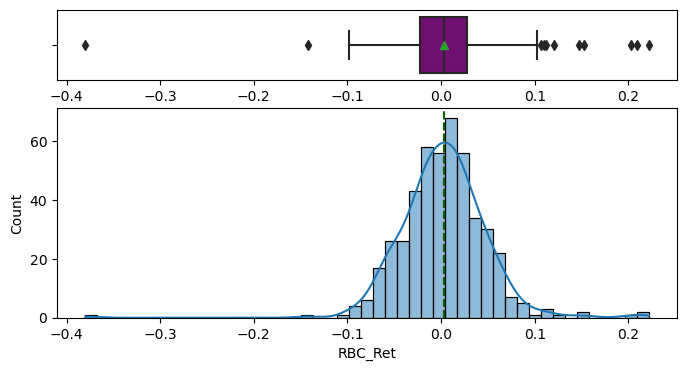

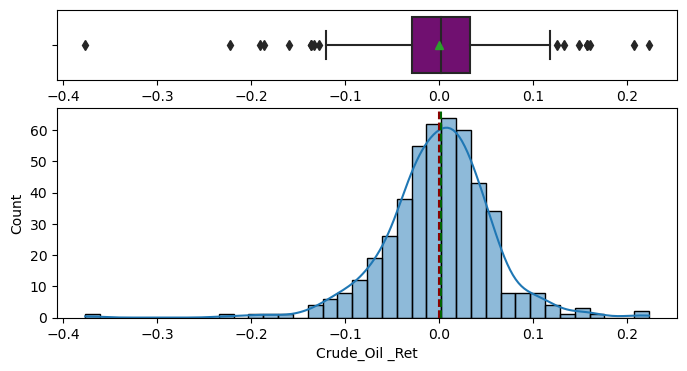

In [12]:
for col in ret_col:
    plot.univ_plot(df_ret,df_ret[col])

* Except NASDAQ, others' weekly returns' histogram shapes are similar.
* Except NASDAQ, most of the weekly returns for the others' are in the range of -5 to 5.

## 3.3 Multivariate

<Axes: >

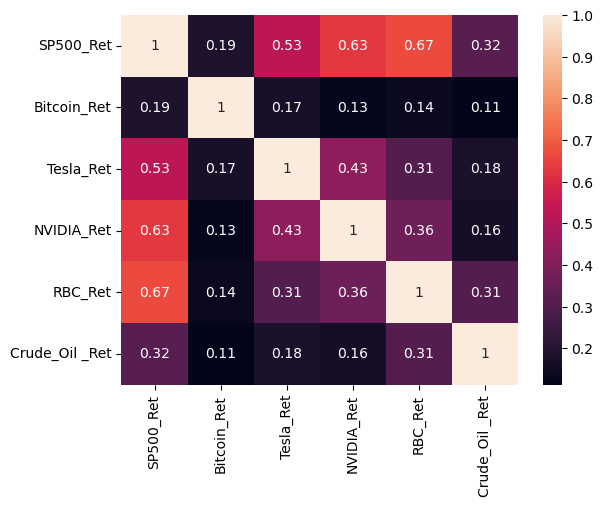

In [20]:
# Correlation
sns.heatmap(df_ret[ret_col].corr(),annot=True)

# **4. Returns and Risks**

In [21]:
import returns

SP500: 
  Max_Hist_Price : 4766.18 on 2021-12-27, Min_Hist_Price : 1864.78 on 2016-02-08 
  Max_Return: 0.11 on 2020-04-06, Min_Return: -0.16 on 2020-03-16 
Bitcoin: 
  Max_Hist_Price : 65466.84 on 2021-11-08, Min_Hist_Price : 210.34 on 2015-01-12 
  Max_Return: 0.35 on 2017-07-17, Min_Return: -0.41 on 2020-03-09 
Tesla: 
  Max_Hist_Price : 407.36 on 2021-11-01, Min_Hist_Price : 10.07 on 2016-02-08 
  Max_Return: 0.29 on 2023-01-23, Min_Return: -0.3 on 2020-02-24 
NVIDIA: 
  Max_Hist_Price : 485.05 on 2023-08-28, Min_Hist_Price : 4.03 on 2014-10-06 
  Max_Return: 0.26 on 2016-11-07, Min_Return: -0.22 on 2018-11-12 
RBC: 
  Max_Hist_Price : 264.44 on 2022-08-08, Min_Hist_Price : 53.7 on 2014-10-06 
  Max_Return: 0.26 on 2020-03-23, Min_Return: -0.39 on 2020-03-16 
Crude_Oil : 
  Max_Hist_Price : 120.67 on 2022-06-06, Min_Hist_Price : 16.94 on 2020-04-20 
  Max_Return: 0.28 on 2020-03-30, Min_Return: -0.35 on 2020-03-16 


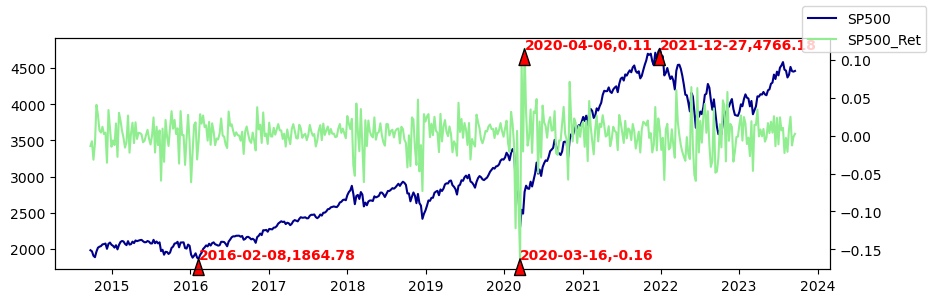

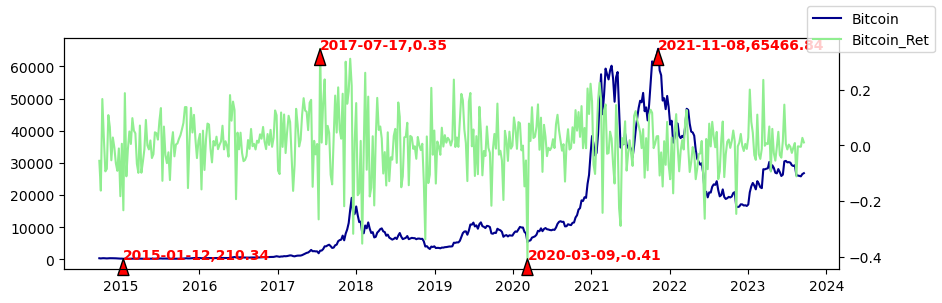

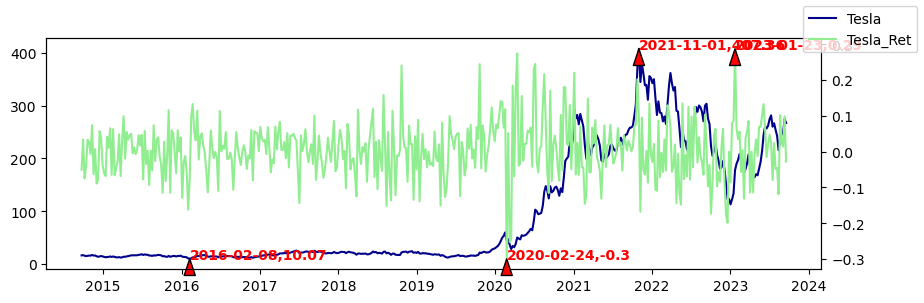

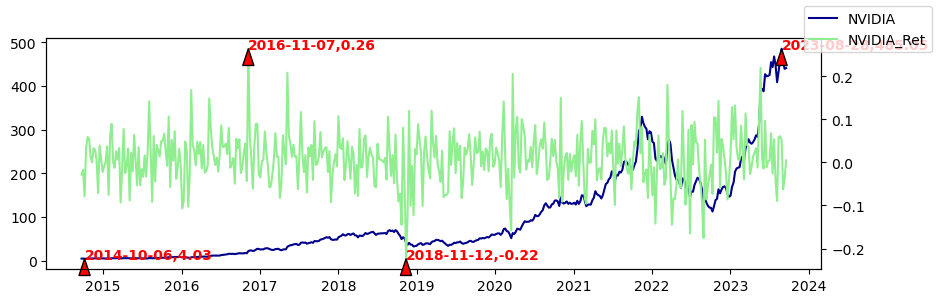

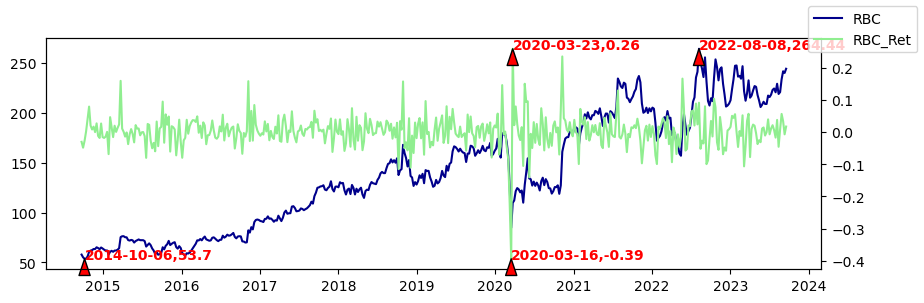

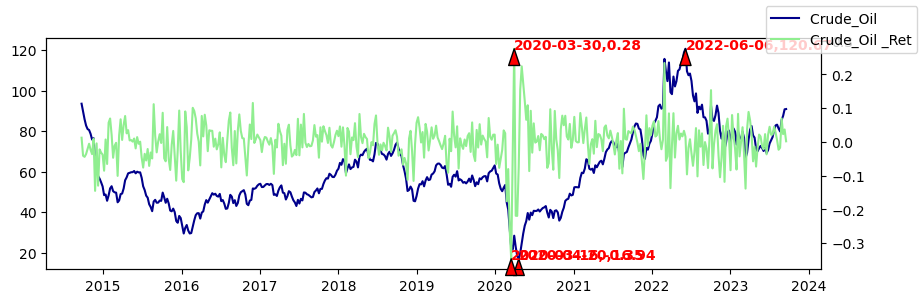

In [22]:
returns.ret_line_plot(df_his,tickers)

## 4.1 Returns

### Comparison in tickers' cumulative returns

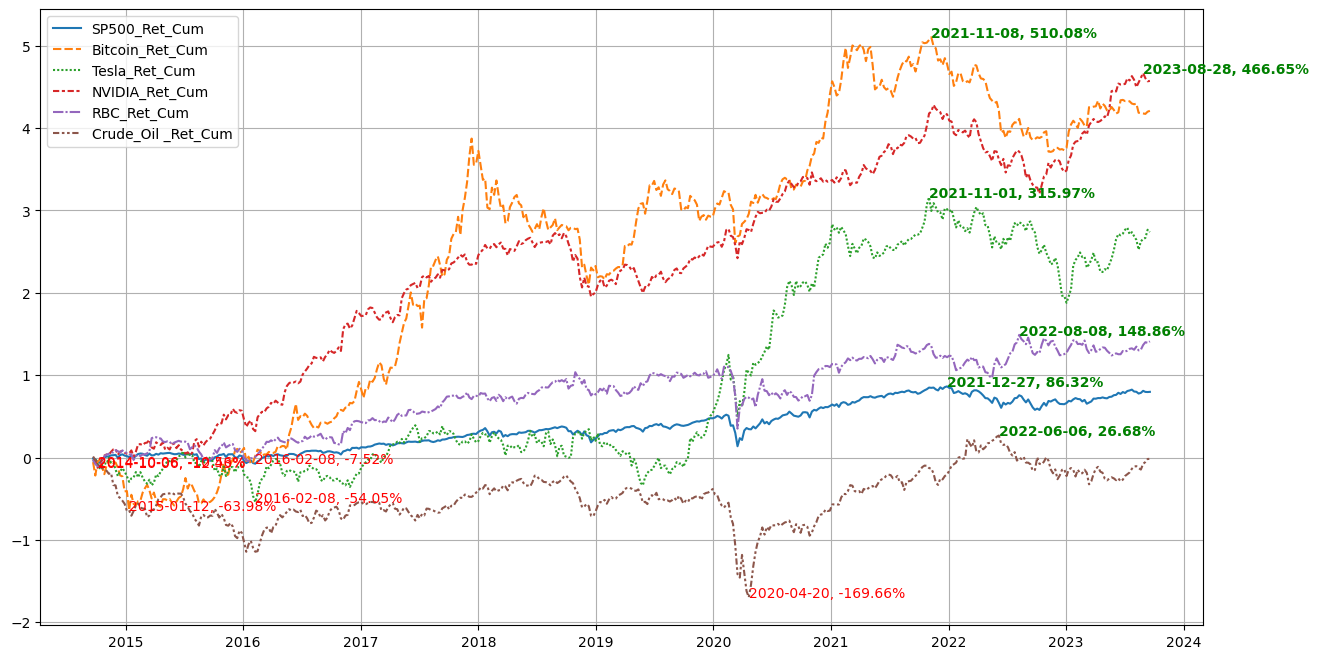

In [23]:
# Cumulative Returns
returns.cum_return_plot(df_ret[cum_col])

### Beta in Comparison to the first ticker you set at the beginning - Compared with the benchmark, how does the stock fluctuate?

In [24]:
import risks

In [25]:
# Beta
df_results['beta'] = risks.beta(df_ret[ret_col],ret_col[0])
df_results

,Cumulative_Return,beta
SP500,0.796880,1.000000
Bitcoin,4.208082,0.774784
Tesla,2.736823,1.719361
NVIDIA,4.571323,1.599816
RBC,1.409706,1.384884
Crude_Oil,-0.016475,0.781356


## 4.2 The Famous Sharpe Ratio

In [26]:
import pfmgmt

In [27]:
df_results['Shapre_Ratio'] = pfmgmt.sharpe_ratio(df_his[ret_col])
df_results

,Cumulative_Return,beta,Shapre_Ratio
SP500,0.796880,1.000000,0.046494
Bitcoin,4.208082,0.774784,0.083288
Tesla,2.736823,1.719361,0.066792
NVIDIA,4.571323,1.599816,0.150255
RBC,1.409706,1.384884,0.048496
Crude_Oil,-0.016475,0.781356,-0.010325


## 4.3 Risks

### Longest Loss Horizon & Days for recovery

In [28]:
df_results

,Cumulative_Return,beta,Shapre_Ratio
SP500,0.796880,1.000000,0.046494
Bitcoin,4.208082,0.774784,0.083288
Tesla,2.736823,1.719361,0.066792
NVIDIA,4.571323,1.599816,0.150255
RBC,1.409706,1.384884,0.048496
Crude_Oil,-0.016475,0.781356,-0.010325


### Maximum Drawdown (MDD) - Test your risk tolerance and investment skills.

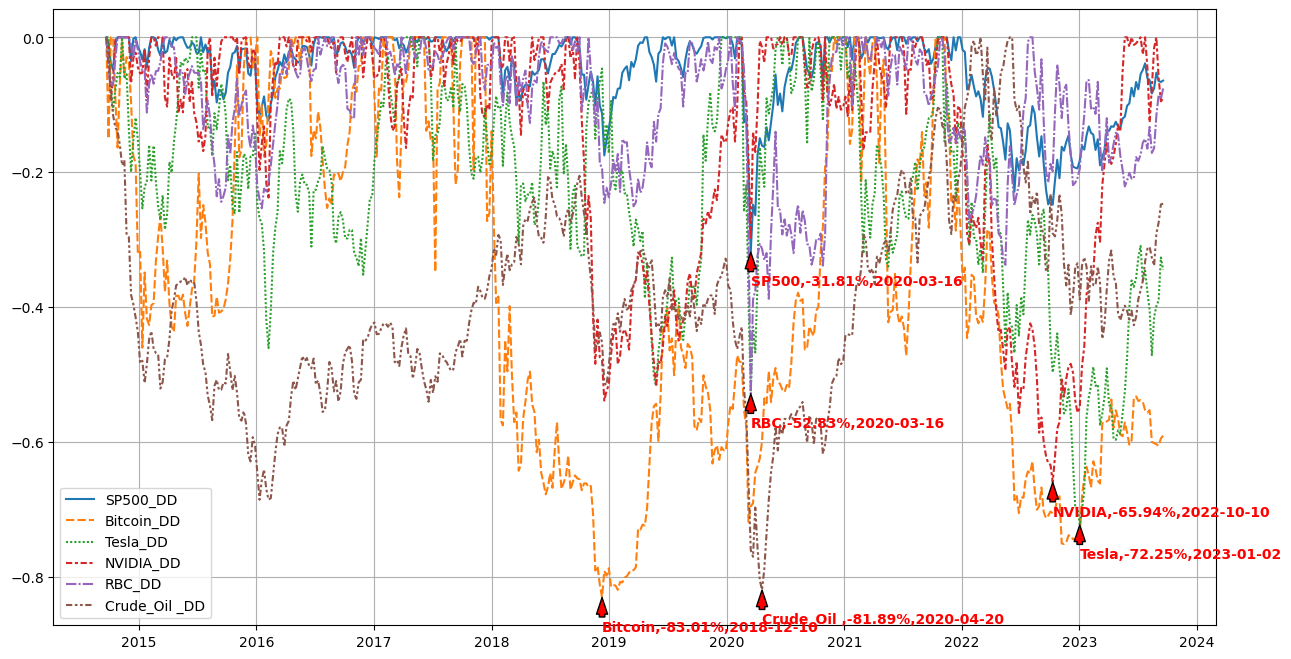

In [29]:
mdd, ddlist,mdd_date = risks.MDD(df_his,tickers=tickers,idx = df_ret.index,plot=True)

In [30]:
ddlist

,SP500_DD,Bitcoin_DD,Tesla_DD,NVIDIA_DD,RBC_DD,Crude_Oil _DD
2014-09-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-09-29,-0.007540,-0.150249,0.000000,-0.017251,-0.047241,-0.040624
2014-10-06,-0.038692,0.000000,-0.071706,-0.091644,-0.072586,-0.082532
2014-10-13,-0.048461,0.000000,-0.108656,-0.060917,-0.070690,-0.115352
2014-10-20,-0.009214,-0.089443,-0.078249,-0.003774,-0.032414,-0.133953
...,...,...,...,...,...,...
2023-08-21,-0.075631,-0.601482,-0.414307,-0.015658,-0.164416,-0.338444
2023-08-28,-0.052539,-0.603317,-0.398547,0.000000,-0.115861,-0.291042
2023-09-04,-0.064767,-0.605415,-0.389979,-0.060545,-0.085381,-0.274799
2023-09-11,-0.066271,-0.594693,-0.326424,-0.094939,-0.091658,-0.247783


### Monte Carlo Simulation VaR - In general, this method is accepted as the best one.

In [31]:
import risks

In [32]:
mcvar = risks.mcVar(df_ret[ret_col])

df_results['MCVaR'] = mcvar

df_results

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1998893117.8747017
Iteration:      2,   Func. Count:     18,   Neg. LLF: 68644.35662951085
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1162.4324530446984
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1162.4324541909373
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 503472.71404728247
Iteration:      2,   Func. Count:     16,   Neg. LLF: 51266.48933085786
Iteration:      3,   Func. Count:     23,   Neg. LLF: -412.35012403572057
Iteration:      4,   Func. Count:     29,   Neg. LLF: -412.4996949070066
Iteration:      5,   Func. Count:     36,   Neg. LLF: -411.93104440040383
Iteration:      6,   Func. Count:     42,   Neg. LLF: -419.96479370635217
Iteration:      7,   Func. Count:     48,   Neg. LLF: -434.4204838163519
Iteration:      8,   Func. Count:     53,   Neg. LLF: -434.

/Users/jakec/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005776. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/arch/univ

,Cumulative_Return,beta,Shapre_Ratio,MCVaR
SP500,0.796880,1.000000,0.046494,-0.035766
Bitcoin,4.208082,0.774784,0.083288,-0.147514
Tesla,2.736823,1.719361,0.066792,-0.116496
NVIDIA,4.571323,1.599816,0.150255,-0.084983
RBC,1.409706,1.384884,0.048496,-0.074709
Crude_Oil,-0.016475,0.781356,-0.010325,-0.092228


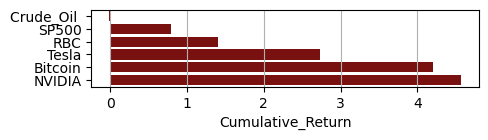

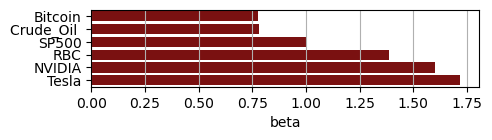

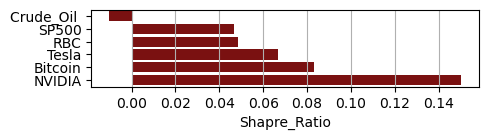

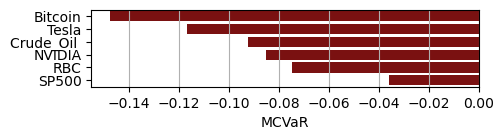

In [33]:
# Why don't we plot the results
for col in df_results.columns:
    plt.figure(figsize=(5,1))
    plt.grid()
    sns.barplot(data=df_results.sort_values(col),x=col, y=df_results.sort_values(col).index, color='darkred')
    plt.show()


# 5. **Portfolio Management** - What if we wanted an optimized Sharpe ratio, increasing returns while reducing risk?

## Equal-Weighted

In [34]:
# Equal weighted portfolio
df_ret

,SP500,Bitcoin,Tesla,NVIDIA,RBC,Crude_Oil,SP500_Ret,Bitcoin_Ret,Tesla_Ret,NVIDIA_Ret,RBC_Ret,Crude_Oil _Ret,SP500_Ret_Cum,Bitcoin_Ret_Cum,Tesla_Ret_Cum,NVIDIA_Ret_Cum,RBC_Ret_Cum,Crude_Oil _Ret_Cum
2014-09-22,1982.849976,377.181000,16.440001,4.435102,57.905396,93.540001,-0.013799,-0.055788,-0.050295,-0.028171,-0.030228,0.012154,-0.013799,-0.055788,-0.050295,-0.028171,-0.030228,0.012154
2014-09-29,1967.900024,320.510010,17.014000,4.358593,55.169865,89.739998,-0.007568,-0.162812,0.034319,-0.017401,-0.048394,-0.041473,-0.021367,-0.218599,-0.015976,-0.045572,-0.078622,-0.029319
2014-10-06,1906.130005,378.549011,15.794000,4.028651,53.702267,85.820000,-0.031892,0.166432,-0.074406,-0.078718,-0.026962,-0.044665,-0.053259,-0.052167,-0.090383,-0.124290,-0.105583,-0.073983
2014-10-13,1886.760010,389.545990,15.165333,4.164931,53.812088,82.750000,-0.010214,0.028636,-0.040618,0.033268,0.002043,-0.036428,-0.063473,-0.023531,-0.131001,-0.091022,-0.103541,-0.110411
2014-10-20,1964.579956,354.704010,15.682667,4.418365,56.028461,81.010002,0.040417,-0.093698,0.033544,0.059070,0.040362,-0.021251,-0.023055,-0.117229,-0.097457,-0.031952,-0.063179,-0.131663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,4405.709961,26089.693359,238.589996,460.142090,220.960007,79.830002,0.008205,-0.003821,0.101832,0.060903,0.008499,-0.017631,0.784568,4.180783,2.624734,4.613814,1.308943,-0.146336
2023-08-28,4515.770020,25969.566406,245.009995,485.050049,233.800003,85.550003,0.024674,-0.004615,0.026552,0.052717,0.056484,0.069202,0.809242,4.176168,2.651286,4.666531,1.365427,-0.077134
2023-09-04,4457.490234,25832.226562,248.500000,455.682465,241.860001,87.510002,-0.012990,-0.005303,0.014144,-0.062456,0.033893,0.022652,0.796252,4.170865,2.665430,4.604075,1.399320,-0.054482
2023-09-11,4450.319824,26534.187500,274.390015,439.000000,240.199997,90.769997,-0.001610,0.026811,0.099108,-0.037297,-0.006887,0.036576,0.794642,4.197677,2.764538,4.566778,1.392433,-0.017906


In [35]:
pf_wt = 1/len(tickers.keys()) 
df_ret['PF_Ret'] = pf_wt * df_ret[ret_col].sum(axis=1)

In [36]:
df_ret['PF_Ret'].describe()

count    470.000000
mean       0.004860
std        0.038821
min       -0.223151
25%       -0.014488
50%        0.007017
75%        0.028408
max        0.120167
Name: PF_Ret, dtype: float64

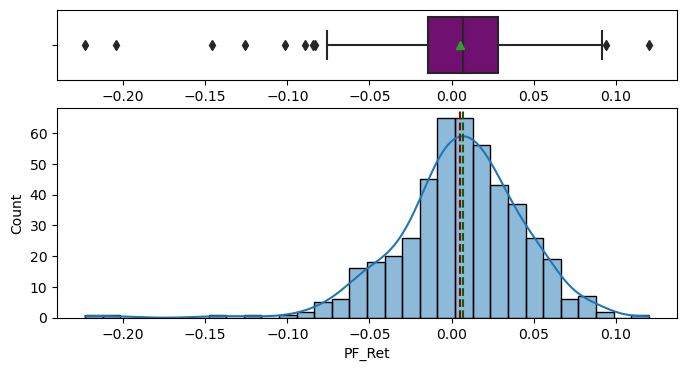

In [37]:
univ_plot(df_ret,df_ret['PF_Ret'])

In [38]:
df_ret['PF_Ret_Cum'] = np.cumsum(df_ret['PF_Ret'])


In [39]:
cum_col.append('PF_Ret_Cum')

In [40]:
df_ret[cum_col]

,SP500_Ret_Cum,Bitcoin_Ret_Cum,Tesla_Ret_Cum,NVIDIA_Ret_Cum,RBC_Ret_Cum,Crude_Oil _Ret_Cum,PF_Ret_Cum
2014-09-22,-0.013799,-0.055788,-0.050295,-0.028171,-0.030228,0.012154,-0.027688
2014-09-29,-0.021367,-0.218599,-0.015976,-0.045572,-0.078622,-0.029319,-0.068242
2014-10-06,-0.053259,-0.052167,-0.090383,-0.124290,-0.105583,-0.073983,-0.083278
2014-10-13,-0.063473,-0.023531,-0.131001,-0.091022,-0.103541,-0.110411,-0.087163
2014-10-20,-0.023055,-0.117229,-0.097457,-0.031952,-0.063179,-0.131663,-0.077422
...,...,...,...,...,...,...,...
2023-08-21,0.784568,4.180783,2.624734,4.613814,1.308943,-0.146336,2.227751
2023-08-28,0.809242,4.176168,2.651286,4.666531,1.365427,-0.077134,2.265253
2023-09-04,0.796252,4.170865,2.665430,4.604075,1.399320,-0.054482,2.263577
2023-09-11,0.794642,4.197677,2.764538,4.566778,1.392433,-0.017906,2.283027


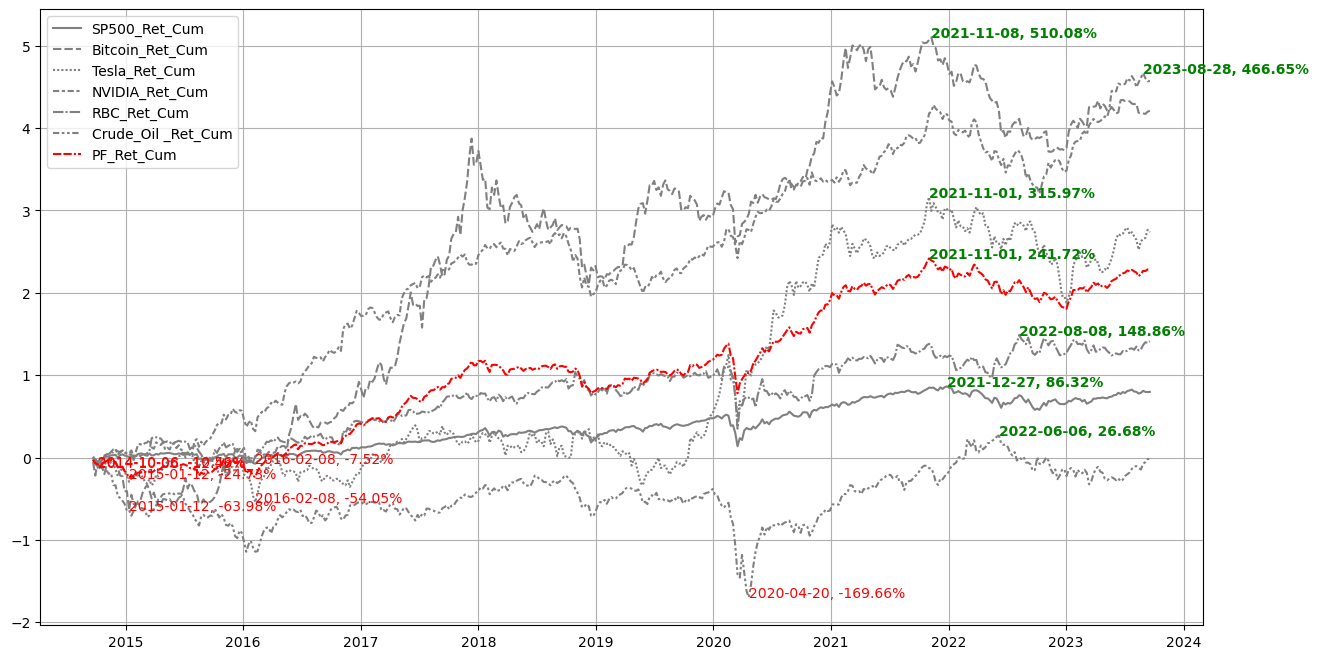

In [41]:

palette = {pf:'red' if pf=='PF_Ret_Cum' else 'grey' for pf in cum_col}

returns.cum_return_plot(df_ret[cum_col],palette=palette)

## Efficient Frontier

In [42]:
from pypfopt import EfficientFrontier

In [53]:
# Calculate expected returns and sample covariance
mu = df_ret[ret_col].mean() * 52
S = df_ret[ret_col].cov()


# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)


In [54]:
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance()

OrderedDict([('SP500_Ret', 0.0), ('Bitcoin_Ret', 0.2184), ('Tesla_Ret', 0.0), ('NVIDIA_Ret', 0.7816), ('RBC_Ret', 0.0), ('Crude_Oil _Ret', 0.0)])


(0.49698636467185486, 0.05487630370427937, 8.692027933263633)

In [ ]:
from finquant.portfolio import build_portfolio


# **5. Price and Volumn**

In [48]:
df_tesla = hist_data[2]
df_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-28 00:00:00-04:00,1.266667,2.028000,1.169333,1.280000,739680000,0.0,0.0
2010-07-05 00:00:00-04:00,1.333333,1.333333,0.998667,1.160000,383259000,0.0,0.0
2010-07-12 00:00:00-04:00,1.196667,1.433333,1.126667,1.376000,231583500,0.0,0.0
2010-07-19 00:00:00-04:00,1.424667,1.483333,1.300000,1.419333,107635500,0.0,0.0
2010-07-26 00:00:00-04:00,1.433333,1.433333,1.303333,1.329333,45780000,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-07 00:00:00-04:00,251.449997,253.649994,238.020004,242.649994,517701600,0.0,0.0
2023-08-14 00:00:00-04:00,235.699997,240.660004,212.360001,215.490005,555809500,0.0,0.0
2023-08-21 00:00:00-04:00,221.550003,240.820007,220.580002,238.589996,573767800,0.0,0.0


In [49]:
df_tesla.index = pd.to_datetime(df_tesla.index.date)

In [50]:
df_tesla['Ret'] = df_tesla['Close'].pct_change()

In [51]:
df_tesla['Vol_Change'] = df_tesla['Volume'].pct_change()

In [52]:
idx = df_tesla[df_tesla['Ret'].isna()].index
df_tesla.drop(index=idx,inplace=True)
df_tesla.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ret,Vol_Change
2010-07-05,1.333333,1.333333,0.998667,1.160000,383259000,0.0,0.0,-0.093750,-0.481858
2010-07-12,1.196667,1.433333,1.126667,1.376000,231583500,0.0,0.0,0.186207,-0.395752
2010-07-19,1.424667,1.483333,1.300000,1.419333,107635500,0.0,0.0,0.031492,-0.535219
2010-07-26,1.433333,1.433333,1.303333,1.329333,45780000,0.0,0.0,-0.063410,-0.574676
2010-08-02,1.366667,1.478667,1.301333,1.306000,65995500,0.0,0.0,-0.017552,0.441579


In [53]:
df_tesla['Ret'] = df_tesla['Ret'] > 0

In [54]:
df_tesla['Vol_Change'] = df_tesla['Vol_Change'] > 0

In [55]:
df_tesla['Ret'] = df_tesla['Ret'].astype(int)
df_tesla['Vol_Change'] = df_tesla['Vol_Change'].astype(int)
df_tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ret,Vol_Change
2010-07-05,1.333333,1.333333,0.998667,1.160000,383259000,0.0,0.0,0,0
2010-07-12,1.196667,1.433333,1.126667,1.376000,231583500,0.0,0.0,1,0
2010-07-19,1.424667,1.483333,1.300000,1.419333,107635500,0.0,0.0,1,0
2010-07-26,1.433333,1.433333,1.303333,1.329333,45780000,0.0,0.0,0,0
2010-08-02,1.366667,1.478667,1.301333,1.306000,65995500,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
2023-08-07,251.449997,253.649994,238.020004,242.649994,517701600,0.0,0.0,0,1
2023-08-14,235.699997,240.660004,212.360001,215.490005,555809500,0.0,0.0,0,1
2023-08-21,221.550003,240.820007,220.580002,238.589996,573767800,0.0,0.0,1,1
2023-08-28,242.580002,261.179993,235.350006,245.009995,604843900,0.0,0.0,1,1


<Axes: >

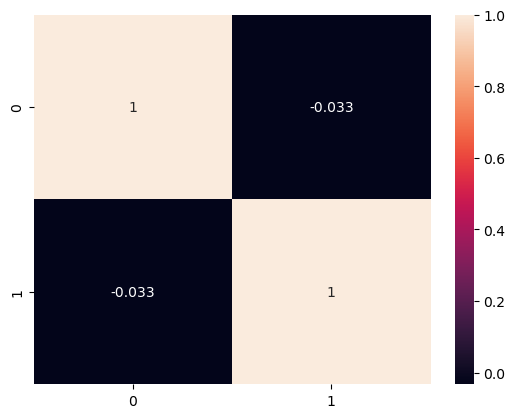

In [56]:
sns.heatmap(np.corrcoef(df_tesla['Ret'],df_tesla['Vol_Change']),annot=True)

In [57]:
ret_til_yesterday = df_tesla['Ret'].shift(1)[1:]
vol_til_yesterday = df_tesla['Vol_Change'].shift(1)[1:]

ret_til_today = df_tesla['Ret'][1:]

<Axes: >

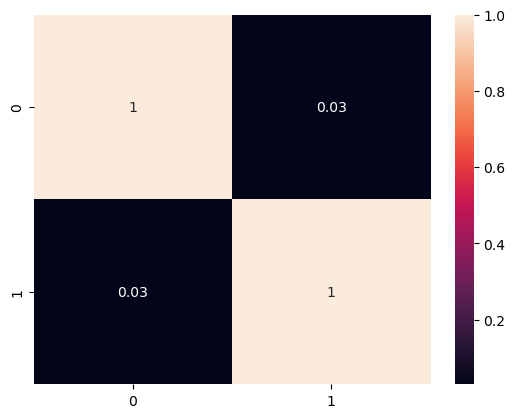

In [58]:
sns.heatmap(np.corrcoef(ret_til_yesterday,ret_til_today),annot=True)

In [62]:
# MODELS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,Normalizer
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier,LogisticRegression,SGDClassifier
from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
# Create models list
dtc = DecisionTreeClassifier(random_state=1)
logr = LogisticRegression()
rigc = RidgeClassifier()
knc = KNeighborsClassifier()
nnc = NearestCentroid()
gnb = GaussianNB()
sgdc = SGDClassifier()
svc = SVC()
mlpc = MLPClassifier()
# Random forest
rdfc = RandomForestClassifier(random_state=42)
# Adaboost
adbc = AdaBoostClassifier(random_state=42)
# GB Boost
gbc = GradientBoostingClassifier(random_state=42)
# XGB Boost
xgbc = XGBClassifier(random_state=42)


model_list =[dtc,svc,logr,rigc,knc,nnc,mlpc,gnb,sgdc,rdfc,adbc,gbc,xgbc]

In [61]:
# Function for collecting vairous scores
def model_scores(target,pred):
    acc = accuracy_score(target,pred)
    reca = recall_score(target, pred) 
    prec = precision_score(target, pred)  
    f1 = f1_score(target, pred)  
    
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": reca,
            "Precision": prec,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

In [68]:
data = {
    'Y':ret_til_today,
    'ret_til_yesterday' : ret_til_yesterday,
    'vol_til_yesterday': vol_til_yesterday
}

df_ml=pd.DataFrame(data,index=df_tesla.index)

idx = df_ml[df_ml['Y'].isna()].index

df_ml.drop(index=idx,inplace=True)
df_ml.head()


,Y,ret_til_yesterday,vol_til_yesterday
2010-07-05,NaN,NaN,NaN
2010-07-12,1.0,0.0,0.0
2010-07-19,1.0,1.0,0.0
2010-07-26,0.0,1.0,0.0
2010-08-02,0.0,0.0,0.0


In [90]:
X = df_ml.drop(columns=['Y']).copy()
y = ret_til_today

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,stratify=y,test_size=0.30)

In [95]:
models,accs,recas,precs,f1s = [],[],[],[],[]

# Train models and put scores in arrays
for model in model_list:
    print('Processing {0}...'.format(model))    
    pipe = make_pipeline(model)
    
    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)

    models.append('{}'.format(model))
    accs.append(accuracy_score(y_test,y_pred))
    recas.append(recall_score(y_test,y_pred))
    precs.append(precision_score(y_test,y_pred))
    f1s.append(f1_score(y_test,y_pred))


# Create a pdataframe to show all of the scores
df_scores = pd.DataFrame(
    {
        'Model':models,
        'Accuracy':accs,
        'Recall':recas,
        'Precision':precs,
        'F1_Score':f1s
    },
)

df_scores.sort_values(['F1_Score'],ascending=False)

Processing DecisionTreeClassifier(random_state=1)...
Processing SVC()...
Processing LogisticRegression()...
Processing RidgeClassifier()...
Processing KNeighborsClassifier()...
Processing NearestCentroid()...
Processing MLPClassifier()...
Processing GaussianNB()...
Processing SGDClassifier()...
Processing RandomForestClassifier(random_state=42)...
Processing AdaBoostClassifier(random_state=42)...
Processing GradientBoostingClassifier(random_state=42)...
Processing XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=No

,Model,Accuracy,Recall,Precision,F1_Score
2,LogisticRegression(),0.555556,1.000000,0.555556,0.714286
3,RidgeClassifier(),0.555556,1.000000,0.555556,0.714286
7,GaussianNB(),0.555556,1.000000,0.555556,0.714286
8,SGDClassifier(),0.555556,1.000000,0.555556,0.714286
10,AdaBoostClassifier(random_state=42),0.555556,1.000000,0.555556,0.714286
4,KNeighborsClassifier(),0.555556,0.826087,0.568862,0.673759
6,MLPClassifier(),0.512077,0.686957,0.548611,0.610039
0,DecisionTreeClassifier(random_state=1),0.512077,0.513043,0.567308,0.538813
1,SVC(),0.512077,0.513043,0.567308,0.538813
9,RandomForestClassifier(random_state=42),0.512077,0.513043,0.567308,0.538813


In [97]:
#Classification
# Bagging, let see if bagging could improve any.

for est in model_list:
    bagc = BaggingClassifier(
            estimator=est,
            n_estimators=10,
            random_state=42,
            n_jobs=-1,
            #verbose=True
        )
    pipe = make_pipeline(bagc)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

    # Append new rows of scores to the df_scoures
    new_row = {
            'Model':'Bagging_{}'.format(est),
            'Accuracy':accuracy_score(y_test,y_pred),
            'Recall':recall_score(y_test,y_pred),
            'Precision':precision_score(y_test,y_pred),
            'F1_Score':f1_score(y_test,y_pred)
        }
    df_scores.loc[len(df_scores)] = new_row

df_scores.sort_values(['F1_Score'],ascending=False)

,Model,Accuracy,Recall,Precision,F1_Score
23,Bagging_AdaBoostClassifier(random_state=42),0.555556,1.000000,0.555556,0.714286
10,AdaBoostClassifier(random_state=42),0.555556,1.000000,0.555556,0.714286
2,LogisticRegression(),0.555556,1.000000,0.555556,0.714286
3,RidgeClassifier(),0.555556,1.000000,0.555556,0.714286
16,Bagging_RidgeClassifier(),0.555556,1.000000,0.555556,0.714286
15,Bagging_LogisticRegression(),0.555556,1.000000,0.555556,0.714286
7,GaussianNB(),0.555556,1.000000,0.555556,0.714286
8,SGDClassifier(),0.555556,1.000000,0.555556,0.714286
20,Bagging_GaussianNB(),0.555556,1.000000,0.555556,0.714286
14,Bagging_SVC(),0.555556,0.826087,0.568862,0.673759


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [99]:
# Place params for all model in one place
model_params = {
    'svc':{
        'kernel':['poly', 'rbf', 'sigmoid'], 
        'C':[0.01, 0.1, 1.0, 10],
        'gamma':['scale','auto']
    },
    'dtc':{
        #'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth': np.arange(2,30), 
        'min_samples_leaf': [1, 2, 5, 7, 10],
        #'max_leaf_nodes' : [2, 3, 5, 10,15],
        'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
    },
    'logr':{
        'penalty':['None','l1','l2','elasticnet'],
        'C':np.logspace(-4,4,20),
        'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
        #'max_iter':[100,500,1500,3000]
    },
    'rigc':{
        'alpha':[0.001,0.01,0.1,10.0],
        'max_iter':[100,500,1500],
        'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    },
    'knc':{
        'n_neighbors':range(1,10,5),
        'weights':['uniform','distance'],
        'metric':['euclidean','manhattan','minkowski'],
        'algorithm':['auto','ball_tree','kd_tree','brute'],
        'leaf_size':range(1,20,5)
    },
    'rdfc':{  
            'max_depth': list(np.arange(10,30,10)) + [None],
            'max_features': ['sqrt',None],
            'min_samples_leaf': np.arange(5,15,5),
            'min_samples_split': np.arange(5, 20, 5),
            'n_estimators': np.arange(20,120,40)
    },
    'adbc':{
        "base_estimator" : [
            DecisionTreeClassifier(max_depth=1),
            DecisionTreeClassifier(max_depth=2)
        ],
        "n_estimators": np.arange(20,120,40),
        "learning_rate":np.arange(0.2,2,0.6)
    },
    'gbc':{
        "n_estimators": [100,175,250],
        "subsample":[0.8,1],
        "max_features":[0.8,0.9,1]
    },
    'xgbc':{
        "n_estimators": [10,30,50],
        "scale_pos_weight":[1,2,5],
        "subsample":[0.7,0.9,1],
        "learning_rate":[0.05, 0.1,0.2],
        "colsample_bytree":[0.7,0.9,1],
        "colsample_bylevel":[0.5,0.7,1]
    }
}

In [101]:
scorer = make_scorer(f1_score)

md_l = {
    'dtc':dtc,
    'logr':logr,
    'rigc':rigc,
    'knc':knc,
    'svc':svc,
    'rdfc':rdfc,
    'adbc':adbc,
    'gbc':gbc,
    'xgbc':xgbc
    }

impt_feat = { }

for md in md_l.keys():
    print('Processing {}...'.format(md))
    gsv = GridSearchCV(
        md_l[md],
        model_params[md],
        #cv=3,
        scoring=scorer,
        n_jobs= -1,
        verbose=True
    )
    
    pipe = make_pipeline(gsv)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

    # Append scores into the df_scores
    new_row = {
        'Model':'HyperParam_{}'.format(md),
        'Accuracy':accuracy_score(y_test,y_pred),
        'Recall':recall_score(y_test,y_pred),
        'Precision':precision_score(y_test,y_pred),
        'F1_Score':f1_score(y_test,y_pred)
    }
    df_scores.loc[len(df_scores)] = new_row
    
    # Save feature_importance into the dictionary of impt_feat, if the estimator has this attribute
    if hasattr(md_l['{}'.format(md)],'feature_importances_'):
        impt_feat['HyperParam_{}'.format(md)] = md_l['{}'.format(md)].feature_importances_
    
    print(gsv.best_estimator_,'\n')

df_scores.sort_values(['F1_Score'],ascending=False)

Processing dtc...
Fitting 5 folds for each of 560 candidates, totalling 2800 fits
DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01, random_state=1) 

Processing logr...
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1300 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  

LogisticRegression(C=0.0001, solver='liblinear') 

Processing rigc...
Fitting 5 folds for each of 84 candidates, totalling 420 fits
RidgeClassifier(alpha=0.001, max_iter=100) 

Processing knc...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=1) 

Processing svc...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
SVC(C=0.01, kernel='poly') 

Processing rdfc...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42) 

Processing adbc...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/jakec/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.2, n_estimators=20, random_state=42) 

Processing gbc...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
GradientBoostingClassifier(max_features=0.8, random_state=42, subsample=0.8) 

Processing xgbc...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_const

,Model,Accuracy,Recall,Precision,F1_Score
34,HyperParam_xgbc,0.555556,1.000000,0.555556,0.714286
10,AdaBoostClassifier(random_state=42),0.555556,1.000000,0.555556,0.714286
23,Bagging_AdaBoostClassifier(random_state=42),0.555556,1.000000,0.555556,0.714286
27,HyperParam_logr,0.555556,1.000000,0.555556,0.714286
20,Bagging_GaussianNB(),0.555556,1.000000,0.555556,0.714286
28,HyperParam_rigc,0.555556,1.000000,0.555556,0.714286
16,Bagging_RidgeClassifier(),0.555556,1.000000,0.555556,0.714286
15,Bagging_LogisticRegression(),0.555556,1.000000,0.555556,0.714286
29,HyperParam_knc,0.555556,1.000000,0.555556,0.714286
30,HyperParam_svc,0.555556,1.000000,0.555556,0.714286


NameError: name 'feature_names' is not defined

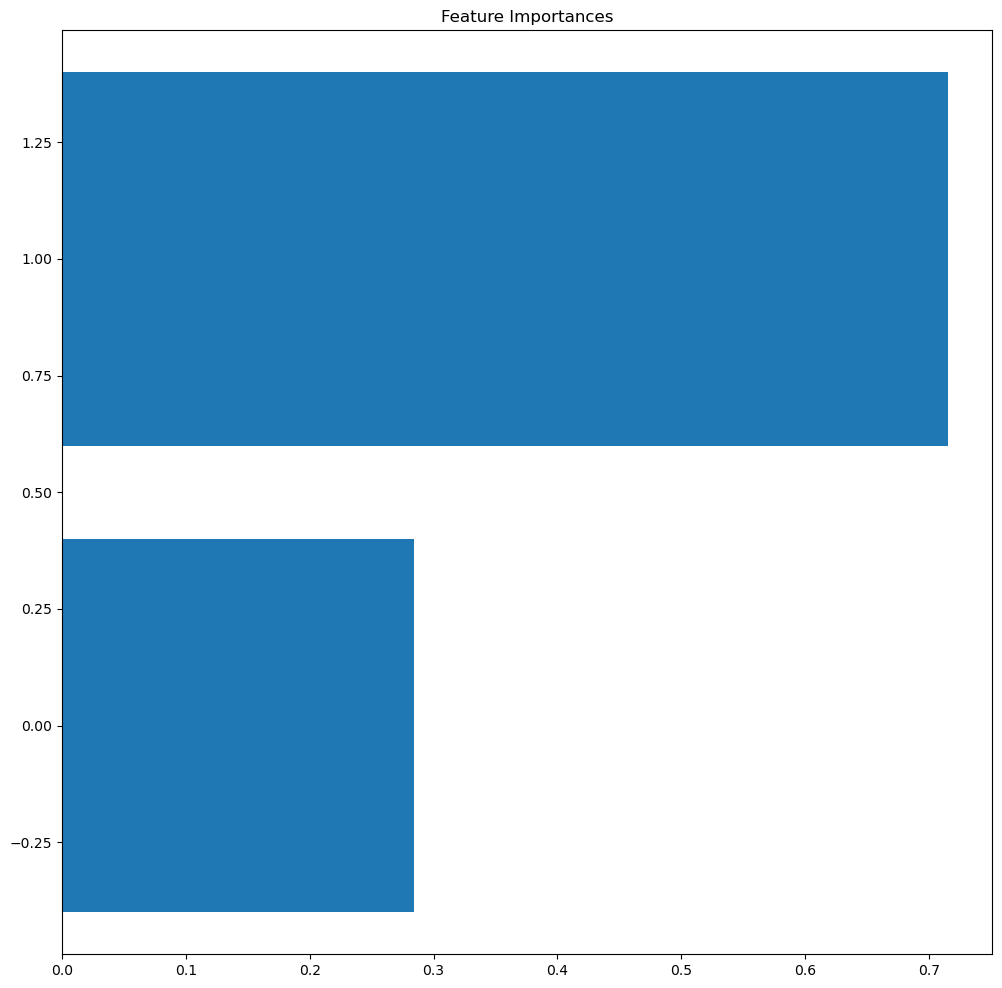

In [103]:
# Plot the importance
importances = impt_feat['HyperParam_xgbc']
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()